In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, accuracy_score
import itertools

In [15]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
cell_df.shape

(699, 11)

In [17]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [18]:
cell_df.shape

(699, 11)

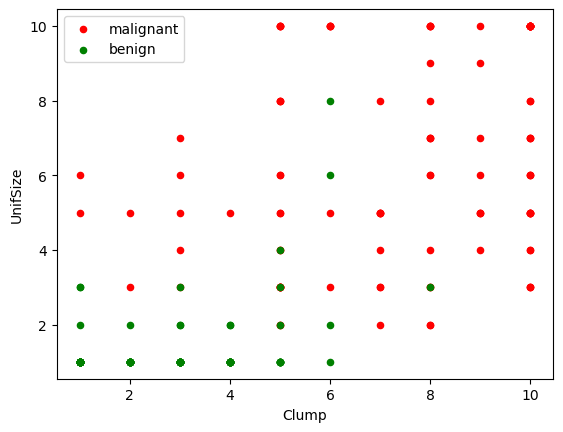

In [19]:
ax = cell_df[cell_df['Class']==4][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color='Red', label='malignant');
cell_df[cell_df['Class']==2][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color='Green', label='benign', ax=ax);
plt.show()

In [20]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [21]:
cell_df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [22]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [23]:
cell_df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [24]:
cell_df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [25]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]

In [26]:
cell_df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [27]:
cell_df.shape

(683, 11)

In [31]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int64')

In [32]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
feature_df = cell_df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [34]:
X = np.asarray(feature_df)
X[0:5]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1]], dtype=int64)

In [35]:
y = np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [37]:
print('Trainset size:',X_train.shape,y_train.shape)
print('Testset size:',X_test.shape,y_test.shape)

Trainset size: (478, 10) (478,)
Testset size: (205, 10) (205,)


## SVM

In [73]:
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed
#clf = svm.SVC(kernel='linear')
#clf = svm.SVC(kernel='poly')
#clf = svm.SVC(kernel='rbf')
clf = svm.SVC(kernel='sigmoid')


In [74]:
clf.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [75]:
yhat = clf.predict(X_test)

In [76]:
yhat[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [77]:
y_test[0:5]

array([4, 4, 2, 2, 2], dtype=int64)

## Evaluation

In [78]:
print(confusion_matrix(y_test,yhat, labels=[2,4]))

[[123   4]
 [ 71   7]]


In [79]:
def plot_confusionmatrix(cm, classes,normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

Confusion Matrix without Normalization
[[123   4]
 [ 71   7]]


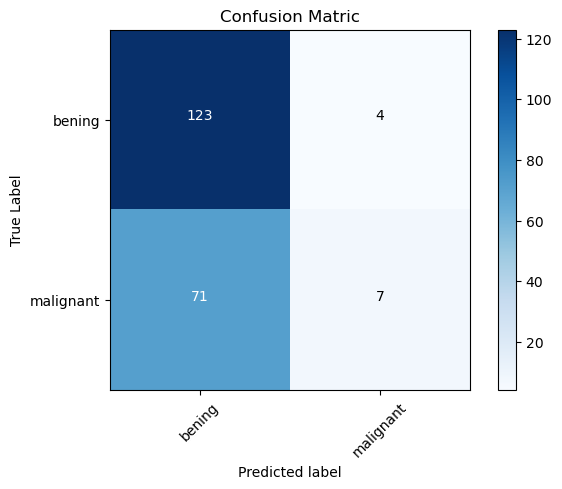

In [80]:
cnf_matrix = confusion_matrix(y_test,yhat,labels=[2,4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusionmatrix(cnf_matrix,classes=['bening','malignant'],normalize=False, title='Confusion Matric')

In [81]:
jaccard_score(y_test,yhat,pos_label=2)

0.6212121212121212

In [82]:
jaccard_score(y_test,yhat,pos_label=4)

0.08536585365853659

In [83]:
accuracy_score(y_test,yhat)

0.6341463414634146